In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks/starbucks.csv


The primary objective of this project was to develop a straightforward program simulating a conversation between a barista and a customer. 

The scenario envisioned is one where the government mandates Starbucks, or a similar company, to disclose the calorie and nutritional details of each order. 

Consequently, after placing an order, customers would receive information illustrating how their chosen items align with their recommended daily intake. 

This initiative aims to enhance transparency and provide customers with valuable insights into the nutritional aspects of their purchases

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("/kaggle/input/starbucks/starbucks.csv")

Firstly, we want to make ourselves familiarized with the data.

In [3]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [4]:
df.groupby('Beverage_prep').Calories.describe()

,count,mean,std,min,25%,50%,75%,max
Beverage_prep,,,,,,,,
2% Milk,50.0,218.000000,98.850537,80.0,140.00,200.0,285.00,510.0
Doppio,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
Grande,7.0,85.714286,98.844515,0.0,10.00,80.0,110.00,280.0
Grande Nonfat Milk,26.0,209.615385,70.454568,80.0,150.00,220.0,260.00,350.0
Short,4.0,37.000000,68.697404,0.0,2.25,4.0,38.75,140.0
Short Nonfat Milk,12.0,99.166667,35.791907,50.0,77.50,100.0,115.00,180.0
Solo,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Soymilk,66.0,207.272727,92.479444,50.0,132.50,195.0,270.00,460.0
Tall,7.0,63.428571,74.446529,0.0,7.00,60.0,80.00,210.0


In [5]:
# Which coffee type has the highest calories.
df[df['Calories'] == 510]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150


<Axes: xlabel='Calories', ylabel='Count'>

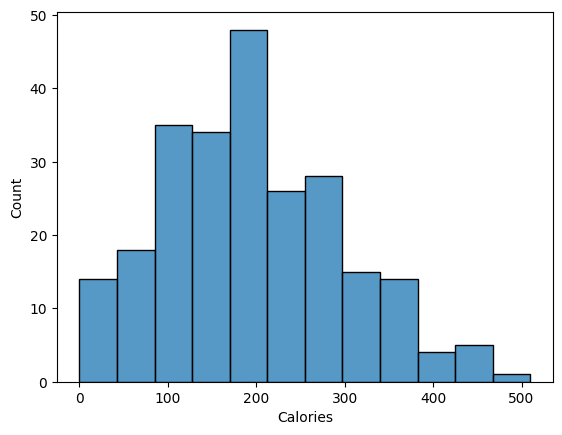

In [6]:
# What's the distribution of calories.
sns.histplot(x = "Calories" ,data = df)

<Axes: xlabel='Calories', ylabel='Beverage_prep'>

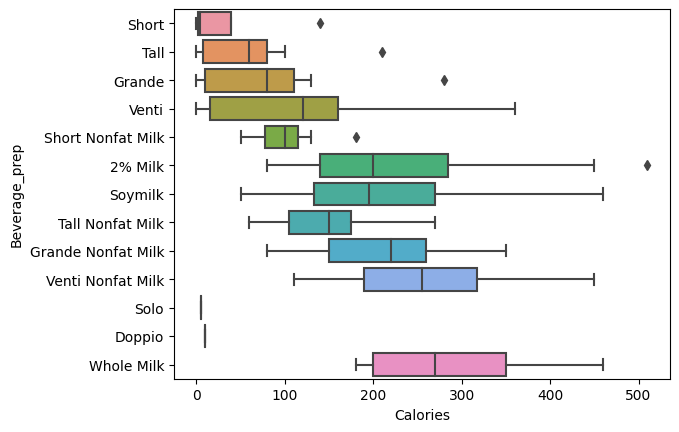

In [7]:
# Which prep option has the highest variance?
sns.boxplot(x = "Calories", y = "Beverage_prep", data = df)

In [8]:
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [9]:
df['Beverage'].value_counts()

Beverage
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè Mocha (Without Whipped Cream)                    12
Caffè Latte                                            12
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Caramel (Without Whipped Cream)                         9
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Strawberries & Crème (Without Whipped Cream)            9
Brewe

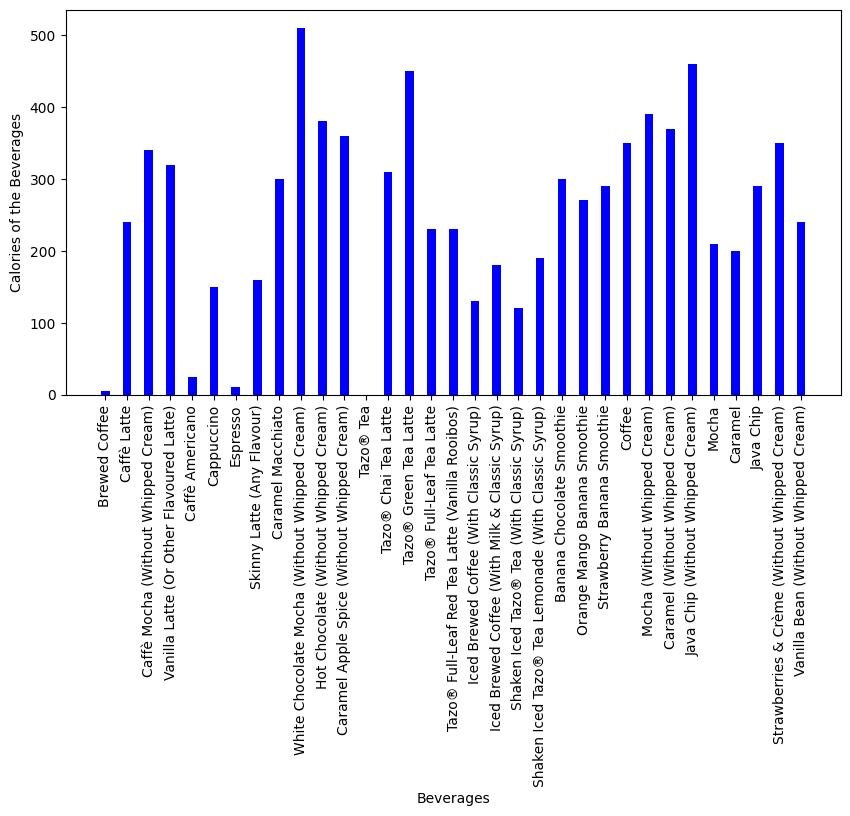

In [10]:
# How beverages and calories spread?

Beverage = df['Beverage']
Calories = df['Calories']
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(Beverage, Calories, color='blue', width=0.4)

plt.xlabel("Beverages")
plt.xticks(rotation=90)
plt.ylabel("Calories of the Beverages")
plt.show()

In [11]:
### Nutrient Recommendations
r_fat = 78
r_carb = 275
r_prot = 50
r_sugr = 50

# Data taken from: https://ods.od.nih.gov/HealthInformation/nutrientrecommendations.aspx

In the class Nutrition below, you may find 4 different functions.

The first one is standard init function where I used selection as the drink choice and prep is the size of the ordered cup.

Second one is the one where I calculated nutrition calculations. According to that, tfat, tcarb, tprot, and tsugr are changing according to the coffee and prep ordered. Dfat, dcarb, dprot, and dsugr variables are representing which portion of the daily consumption does the order meet.

In the third one, I'm basically displaying the results accordingly.

In the fourth one, I'm visualizing the results that we get from dfat, dcarb etc.


In [12]:
class Nutrition:

  def __init__(self, selection, prep):
    self.selection = selection
    self.prep = prep


  def nutr_cal(self):
      tfat = float(df[(df['Beverage'] == self.selection) & (df['Beverage_prep'] == self.prep)][' Total Fat (g)'].values[0])
      tcarb = float(df[(df['Beverage'] == self.selection) & (df['Beverage_prep'] == self.prep)][' Total Carbohydrates (g) '].values[0])
      tprot = float(df[(df['Beverage'] == self.selection) & (df['Beverage_prep'] == self.prep)][' Protein (g) '].values[0])
      tsugr = float(df[(df['Beverage'] == self.selection) & (df['Beverage_prep'] == self.prep)][' Sugars (g)'].values[0])

      dfat = round((tfat/r_fat)*100,1)
      dcarb = round((tcarb/r_carb)*100,1)
      dprot = round((tprot/r_prot)*100,1)
      dsugr = round((tsugr/r_sugr)*100,1)

      return tfat, tcarb, tprot, tsugr, dfat,dcarb,dprot,dsugr


  def ingr(self):
      tfat, tcarb, tprot, tsugr, dfat,dcarb,dprot,dsugr = self.nutr_cal()

      if selection in df['Beverage'].unique():
          print("Awesome! Your drink will be ready in minutes!")
          print()
          print(f"Total Fat of your drink is {tfat} grams which is equivalent to {dfat}% of daily recommendations.")
          print(f"Total Carbs of your drink is {tcarb} grams which is equivalent to {dcarb}% of daily recommendation.")
          print(f"Total Protein of your drink is {tprot} grams which is equivalent to {dprot}% of daily recommendation.")
          print(f"Your drink includes {tsugr} grams of Sugar which is equivalent to {dsugr}% of daily recommendation.")
          
  def visualize(self):
        print()
        print("Wonderful! You can track your intake graphs from the screen!")

        tfat, tcarb, tprot, tsugr, dfat, dcarb, dprot, dsugr = self.nutr_cal()

        # Create side-by-side bar plots for daily total fat, carbs, protein, and sugar intake vs. daily recommendations
        nutrients = ['Total Fat', 'Total Carbs', 'Total Protein', 'Total Sugar']
        daily_intake = [tfat, tcarb, tprot, tsugr]
        daily_recommendation = [r_fat, r_carb, r_prot, r_sugr]

        width = 0.35  # Width of the bars

        fig, ax = plt.subplots()
        ax.bar(nutrients, daily_intake, width, label='Daily Intake', color='red')
        ax.bar([i + width for i in range(len(nutrients))], daily_recommendation, width, label='Daily Recommendation', color='green')

        ax.set_ylabel('Grams')
        ax.set_title('Daily Nutrient Intake vs. Daily Recommendation')
        ax.legend()

        plt.show()

        # Create a bar plot for daily percentage recommendations
        labels_percent = ['Fat', 'Carbs', 'Protein', 'Sugar']
        percentages = [dfat, dcarb, dprot, dsugr]

        plt.bar(labels_percent, percentages, color=['red', 'orange', 'purple', 'brown'])
        plt.ylabel('Percentage of Daily Recommendation')
        plt.title('Daily Percentage Intake vs. Daily Recommendation')
        plt.show()




This part is the section that we get the answers from customers and calling the functions. 

In [13]:
#while True:
    #selection = input("What you would like to drink today?: ")
    #if selection in df['Beverage'].unique():
        #options = [i for i in df[(df['Beverage'] == selection)].Beverage_prep.values[0:]]
        #print(f"Which size you would want?: {options}")    
        #print()    
        #prep = input("Which Size?: ")
        #print("Sure!")
        #break
    #else:
        #print("Unfortunately! Please select other options.")
        #break


In [14]:
selection = 'Java Chip'
prep = 'Tall Nonfat Milk'

Awesome! Your drink will be ready in minutes!

Total Fat of your drink is 3.0 grams which is equivalent to 3.8% of daily recommendations.
Total Carbs of your drink is 170.0 grams which is equivalent to 61.8% of daily recommendation.
Total Protein of your drink is 4.0 grams which is equivalent to 8.0% of daily recommendation.
Your drink includes 27.0 grams of Sugar which is equivalent to 54.0% of daily recommendation.

Wonderful! You can track your intake graphs from the screen!


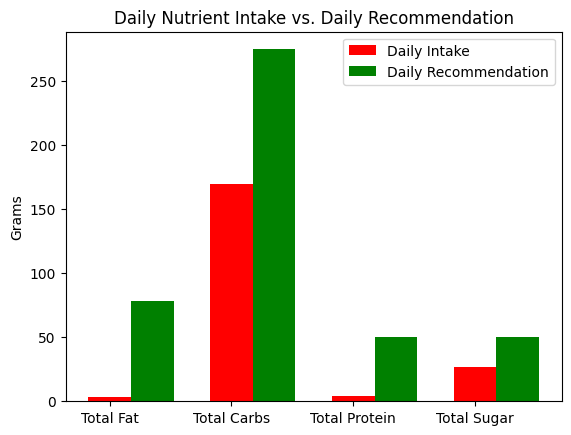

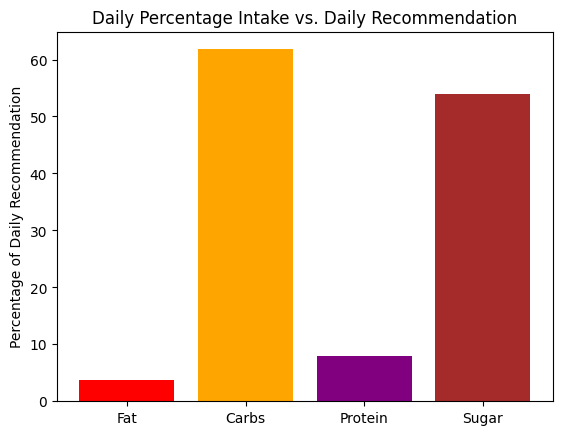

In [15]:
myDrink = Nutrition(selection, prep)
myDrink.ingr() 
myDrink.visualize()